# Global variables

In [41]:
pathdf = r'content/combined_lagEDA.csv' # Path of the file 
Yvar = 'Stress' # Name of the variable Y to predict
aggtype = ['mean', 'std']
palette = 'flare'
seed = 49
test_size = 0.30 # % size of test

## Configuration 

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics



from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [43]:
sns.color_palette(palette, 10)

[(0.92118373, 0.60184659, 0.45048789),
 (0.910403, 0.51342591, 0.39932342),
 (0.89260152, 0.42376366, 0.36526813),
 (0.85754536, 0.33574168, 0.36373567),
 (0.79876118, 0.27347974, 0.39064559),
 (0.71837612, 0.24102046, 0.41863486),
 (0.63329016, 0.21816454, 0.43555493),
 (0.54585987, 0.19467771, 0.44234111),
 (0.46073893, 0.17645017, 0.43417097),
 (0.37562649, 0.15974704, 0.41151182)]

## Overview

In [44]:
df = pd.read_csv(pathdf)  #Here is my data load function using the pandas library, i Loaded 12445 rows and 49 columns
print(df)

             30        29        28        27        26        25        24  \
0      0.132578  0.123534  0.115152  0.110787  0.109565  0.106694  0.100631   
1      0.123534  0.115152  0.110787  0.109565  0.106694  0.100631  0.093710   
2      0.115152  0.110787  0.109565  0.106694  0.100631  0.093710  0.088657   
3      0.110787  0.109565  0.106694  0.100631  0.093710  0.088657  0.084547   
4      0.109565  0.106694  0.100631  0.093710  0.088657  0.084547  0.084598   
...         ...       ...       ...       ...       ...       ...       ...   
12440  0.004501  0.003168  0.002717  0.003151  0.003728  0.003796  0.003643   
12441  0.003168  0.002717  0.003151  0.003728  0.003796  0.003643  0.003660   
12442  0.002717  0.003151  0.003728  0.003796  0.003643  0.003660  0.004153   
12443  0.003151  0.003728  0.003796  0.003643  0.003660  0.004153  0.005282   
12444  0.003728  0.003796  0.003643  0.003660  0.004153  0.005282  0.006165   

             23        22        21  ...  HRR_Mean 

In [45]:
df.head() #here is all data of this data set 5 rows and 49 columns but I will be work only specific data, I have loaded this project data next df.head(). 

,30,29,28,27,26,25,24,23,22,21,...,HRR_Mean,HRR_Min,HRR_Max,HRR_Std,HRR_RMS,TEMPR_Mean,TEMPR_Min,TEMPR_Max,TEMPR_Std,Stress
0,0.132578,0.123534,0.115152,0.110787,0.109565,0.106694,0.100631,0.093710,0.088657,0.084547,...,0.641552,0.639566,0.643243,0.100525,0.235069,0.821491,0.821239,0.823944,0.120422,0.0
1,0.123534,0.115152,0.110787,0.109565,0.106694,0.100631,0.093710,0.088657,0.084547,0.084598,...,0.642973,0.639566,0.643243,0.089270,0.229293,0.827471,0.828319,0.830986,0.105027,0.0
2,0.115152,0.110787,0.109565,0.106694,0.100631,0.093710,0.088657,0.084547,0.084598,0.089846,...,0.643921,0.640921,0.645946,0.083372,0.157093,0.832395,0.831858,0.834507,0.099446,0.0
3,0.110787,0.109565,0.106694,0.100631,0.093710,0.088657,0.084547,0.084598,0.089846,0.094890,...,0.645952,0.644986,0.645946,0.041375,0.131024,0.837759,0.842478,0.839789,0.089739,0.0
4,0.109565,0.106694,0.100631,0.093710,0.088657,0.084547,0.084598,0.089846,0.094890,0.098347,...,0.646764,0.644986,0.648649,0.066093,0.113470,0.843123,0.846018,0.848592,0.095171,0.0


In [46]:
# Here are my selected only the desired columns for this project below and update data frame df will load future function 
selected_columns = ['EDAR_Mean', 'EDAR_Std', 'Num_PeaksR', 'HRR_Mean', 'HRR_Std', 'TEMPR_Mean', 'TEMPR_Std', 'Stress']
df = df[selected_columns]

df.head()

,EDAR_Mean,EDAR_Std,Num_PeaksR,HRR_Mean,HRR_Std,TEMPR_Mean,TEMPR_Std,Stress
0,0.105191,0.035656,0.0,0.641552,0.100525,0.821491,0.120422,0.0
1,0.102822,0.023788,0.0,0.642973,0.089270,0.827471,0.105027,0.0
2,0.101157,0.018717,0.0,0.643921,0.083372,0.832395,0.099446,0.0
3,0.099952,0.011283,0.0,0.645952,0.041375,0.837759,0.089739,0.0
4,0.099298,0.005735,0.0,0.646764,0.066093,0.843123,0.095171,0.0


In [47]:
df.shape #Here is totale data rows and columns 

(12445, 8)

## Descriptives statistics 

### Univariate

In [48]:
#Here is data describe for this project. 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EDAR_Mean,12445.0,0.209896,0.104536,0.0,0.143117,0.206731,0.259721,1.0
EDAR_Std,12445.0,0.063885,0.082410,0.0,0.019800,0.039781,0.075773,1.0
Num_PeaksR,12445.0,0.074126,0.181042,0.0,0.000000,0.000000,0.000000,1.0
HRR_Mean,12445.0,0.531330,0.236169,0.0,0.328595,0.573044,0.740726,1.0
HRR_Std,12445.0,0.058898,0.030202,0.0,0.043969,0.054869,0.068181,1.0
TEMPR_Mean,12445.0,0.467482,0.206970,0.0,0.322371,0.512487,0.625923,1.0
TEMPR_Std,12445.0,0.082092,0.047557,0.0,0.056860,0.072770,0.093023,1.0
Stress,12445.0,0.949779,0.903741,0.0,0.000000,1.000000,2.000000,2.0


In [49]:
#Here is check the number of missing (NaN) values for each column in this DataFrame,
df.isna().sum()

EDAR_Mean     0
EDAR_Std      0
Num_PeaksR    0
HRR_Mean      0
HRR_Std       0
TEMPR_Mean    0
TEMPR_Std     0
Stress        0
dtype: int64

In [50]:
# Display a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12445 entries, 0 to 12444
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EDAR_Mean   12445 non-null  float64
 1   EDAR_Std    12445 non-null  float64
 2   Num_PeaksR  12445 non-null  float64
 3   HRR_Mean    12445 non-null  float64
 4   HRR_Std     12445 non-null  float64
 5   TEMPR_Mean  12445 non-null  float64
 6   TEMPR_Std   12445 non-null  float64
 7   Stress      12445 non-null  float64
dtypes: float64(8)
memory usage: 777.9 KB


In [51]:
# Here is assuming the DataFrame 'df' and group by column 'Yvar' and apply aggregation function(s) from 'aggtype'
df.groupby(Yvar).agg(aggtype)

EDAR_Mean            EDAR_Std           Num_PeaksR            HRR_Mean  \
            mean       std      mean       std       mean       std      mean   
Stress                                                                          
0.0     0.172351  0.104366  0.055162  0.065891   0.070518  0.175894  0.537097   
1.0     0.229339  0.099549  0.074894  0.100680   0.078889  0.188306  0.544647   
2.0     0.243203  0.092572  0.068570  0.088467   0.075967  0.183242  0.518548   

                   HRR_Std           TEMPR_Mean           TEMPR_Std            
             std      mean       std       mean       std      mean       std  
Stress                                                                         
0.0     0.243840  0.057534  0.031945   0.541063  0.189222  0.082361  0.051351  
1.0     0.206367  0.060759  0.035588   0.391931  0.203591  0.084292  0.043802  
2.0     0.239898  0.059565  0.024887   0.419816  0.200942  0.080754  0.044670

### Bivariates

In [52]:
df.corr()

,EDAR_Mean,EDAR_Std,Num_PeaksR,HRR_Mean,HRR_Std,TEMPR_Mean,TEMPR_Std,Stress
EDAR_Mean,1.000000,0.375326,0.007842,0.028150,0.012492,0.029463,0.002551,0.308340
EDAR_Std,0.375326,1.000000,-0.200031,-0.058697,0.073785,-0.016977,0.019933,0.075108
Num_PeaksR,0.007842,-0.200031,1.000000,0.013078,-0.013462,-0.006776,-0.005626,0.013914
HRR_Mean,0.028150,-0.058697,0.013078,1.000000,-0.128394,-0.291501,0.090610,-0.034776
HRR_Std,0.012492,0.073785,-0.013462,-0.128394,1.000000,0.022783,0.008214,0.031129
TEMPR_Mean,0.029463,-0.016977,-0.006776,-0.291501,0.022783,1.000000,-0.161525,-0.269011
TEMPR_Std,0.002551,0.019933,-0.005626,0.090610,0.008214,-0.161525,1.000000,-0.014696
Stress,0.308340,0.075108,0.013914,-0.034776,0.031129,-0.269011,-0.014696,1.000000


In [53]:
df.groupby(Yvar).corr() # I have assuming this DataFrame 'df' and a column name for grouping 'Yvar'

EDAR_Mean  EDAR_Std  Num_PeaksR  HRR_Mean   HRR_Std  \
Stress                                                                   
0.0    EDAR_Mean    1.000000  0.311763    0.032471  0.036961 -0.043227   
       EDAR_Std     0.311763  1.000000   -0.198056 -0.042510  0.083540   
       Num_PeaksR   0.032471 -0.198056    1.000000  0.012962 -0.022884   
       HRR_Mean     0.036961 -0.042510    0.012962  1.000000 -0.135003   
       HRR_Std     -0.043227  0.083540   -0.022884 -0.135003  1.000000   
       TEMPR_Mean   0.090281 -0.045620    0.039128 -0.101396  0.006705   
       TEMPR_Std    0.027046  0.028671    0.003039  0.063376  0.011635   
1.0    EDAR_Mean    1.000000  0.405874   -0.027687  0.016246  0.053092   
       EDAR_Std     0.405874  1.000000   -0.210174 -0.023803  0.031716   
       Num_PeaksR  -0.027687 -0.210174    1.000000  0.003314 -0.004141   
       HRR_Mean     0.016246 -0.023803    0.003314  1.000000 -0.099334   
       HRR_Std      0.053092  0.031716   -0.004141 -0.099334  1.000000   
       TEMPR_Mean   0.250392  0.017970   -0.038163 -0.404771  0.072654   
       TEMPR_Std    0.012960  0.014827    0.002076  0.082831 -0.005799   
2.0    EDAR_Mean    1.000000  0.420906   -0.017802  0.051165  0.034704   
       EDAR_Std     0.420906  1.000000   -0.207471 -0.090419  0.090499   
       Num_PeaksR  -0.017802 -0.207471    1.000000  0.017804 -0.009649   
       HRR_Mean     0.051165 -0.090419    0.017804  1.000000 -0.141445   
       HRR_Std      0.034704  0.090499   -0.009649 -0.141445  1.000000   
       TEMPR_Mean   0.142974  0.059465   -0.024113 -0.506054  0.057710   
       TEMPR_Std   -0.029397  0.015263   -0.020333  0.127405  0.011461   

                   TEMPR_Mean  TEMPR_Std  
Stress                                    
0.0    EDAR_Mean     0.090281   0.027046  
       EDAR_Std     -0.045620   0.028671  
       Num_PeaksR    0.039128   0.003039  
       HRR_Mean     -0.101396   0.063376  
       HRR_Std       0.006705   0.011635  
       TEMPR_Mean    1.000000  -0.165722  
       TEMPR_Std    -0.165722   1.000000  
1.0    EDAR_Mean     0.250392   0.012960  
       EDAR_Std      0.017970   0.014827  
       Num_PeaksR   -0.038163   0.002076  
       HRR_Mean     -0.404771   0.082831  
       HRR_Std       0.072654  -0.005799  
       TEMPR_Mean    1.000000  -0.145512  
       TEMPR_Std    -0.145512   1.000000  
2.0    EDAR_Mean     0.142974  -0.029397  
       EDAR_Std      0.059465   0.015263  
       Num_PeaksR   -0.024113  -0.020333  
       HRR_Mean     -0.506054   0.127405  
       HRR_Std       0.057710   0.011461  
       TEMPR_Mean    1.000000  -0.190827  
       TEMPR_Std    -0.190827   1.000000

## Visualization

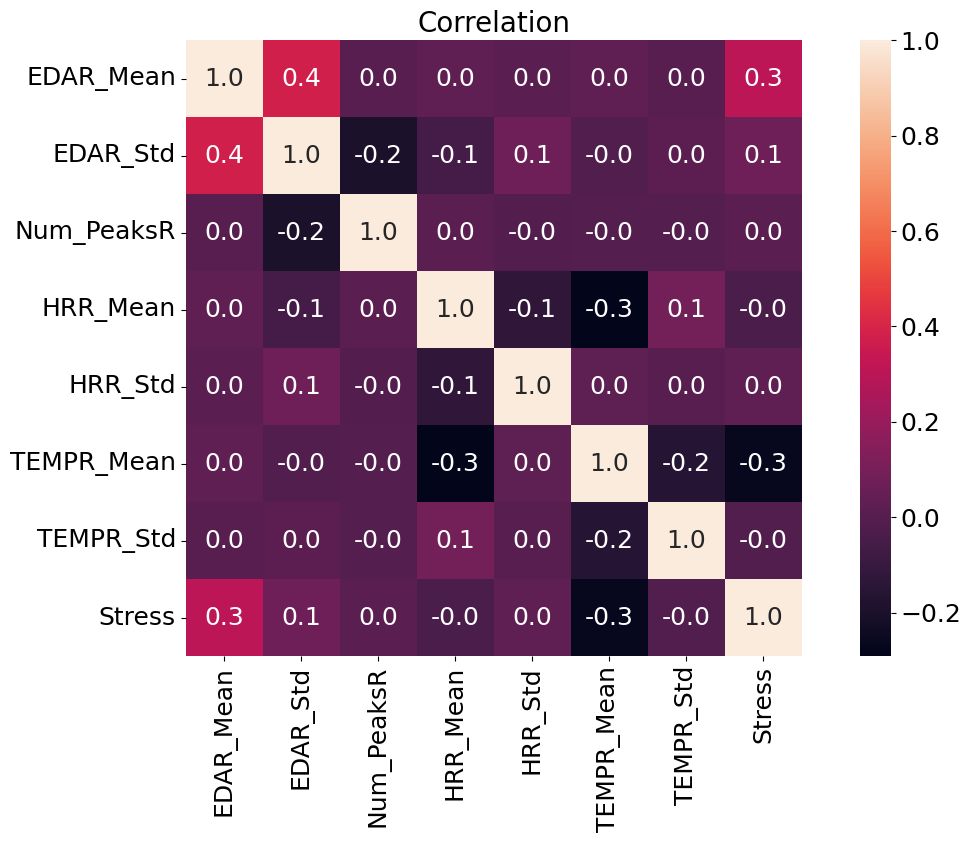

In [54]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, square=True, fmt='.1f')
plt.title('Correlation', fontsize = 20)
plt.show()

<Figure size 1500x800 with 0 Axes>

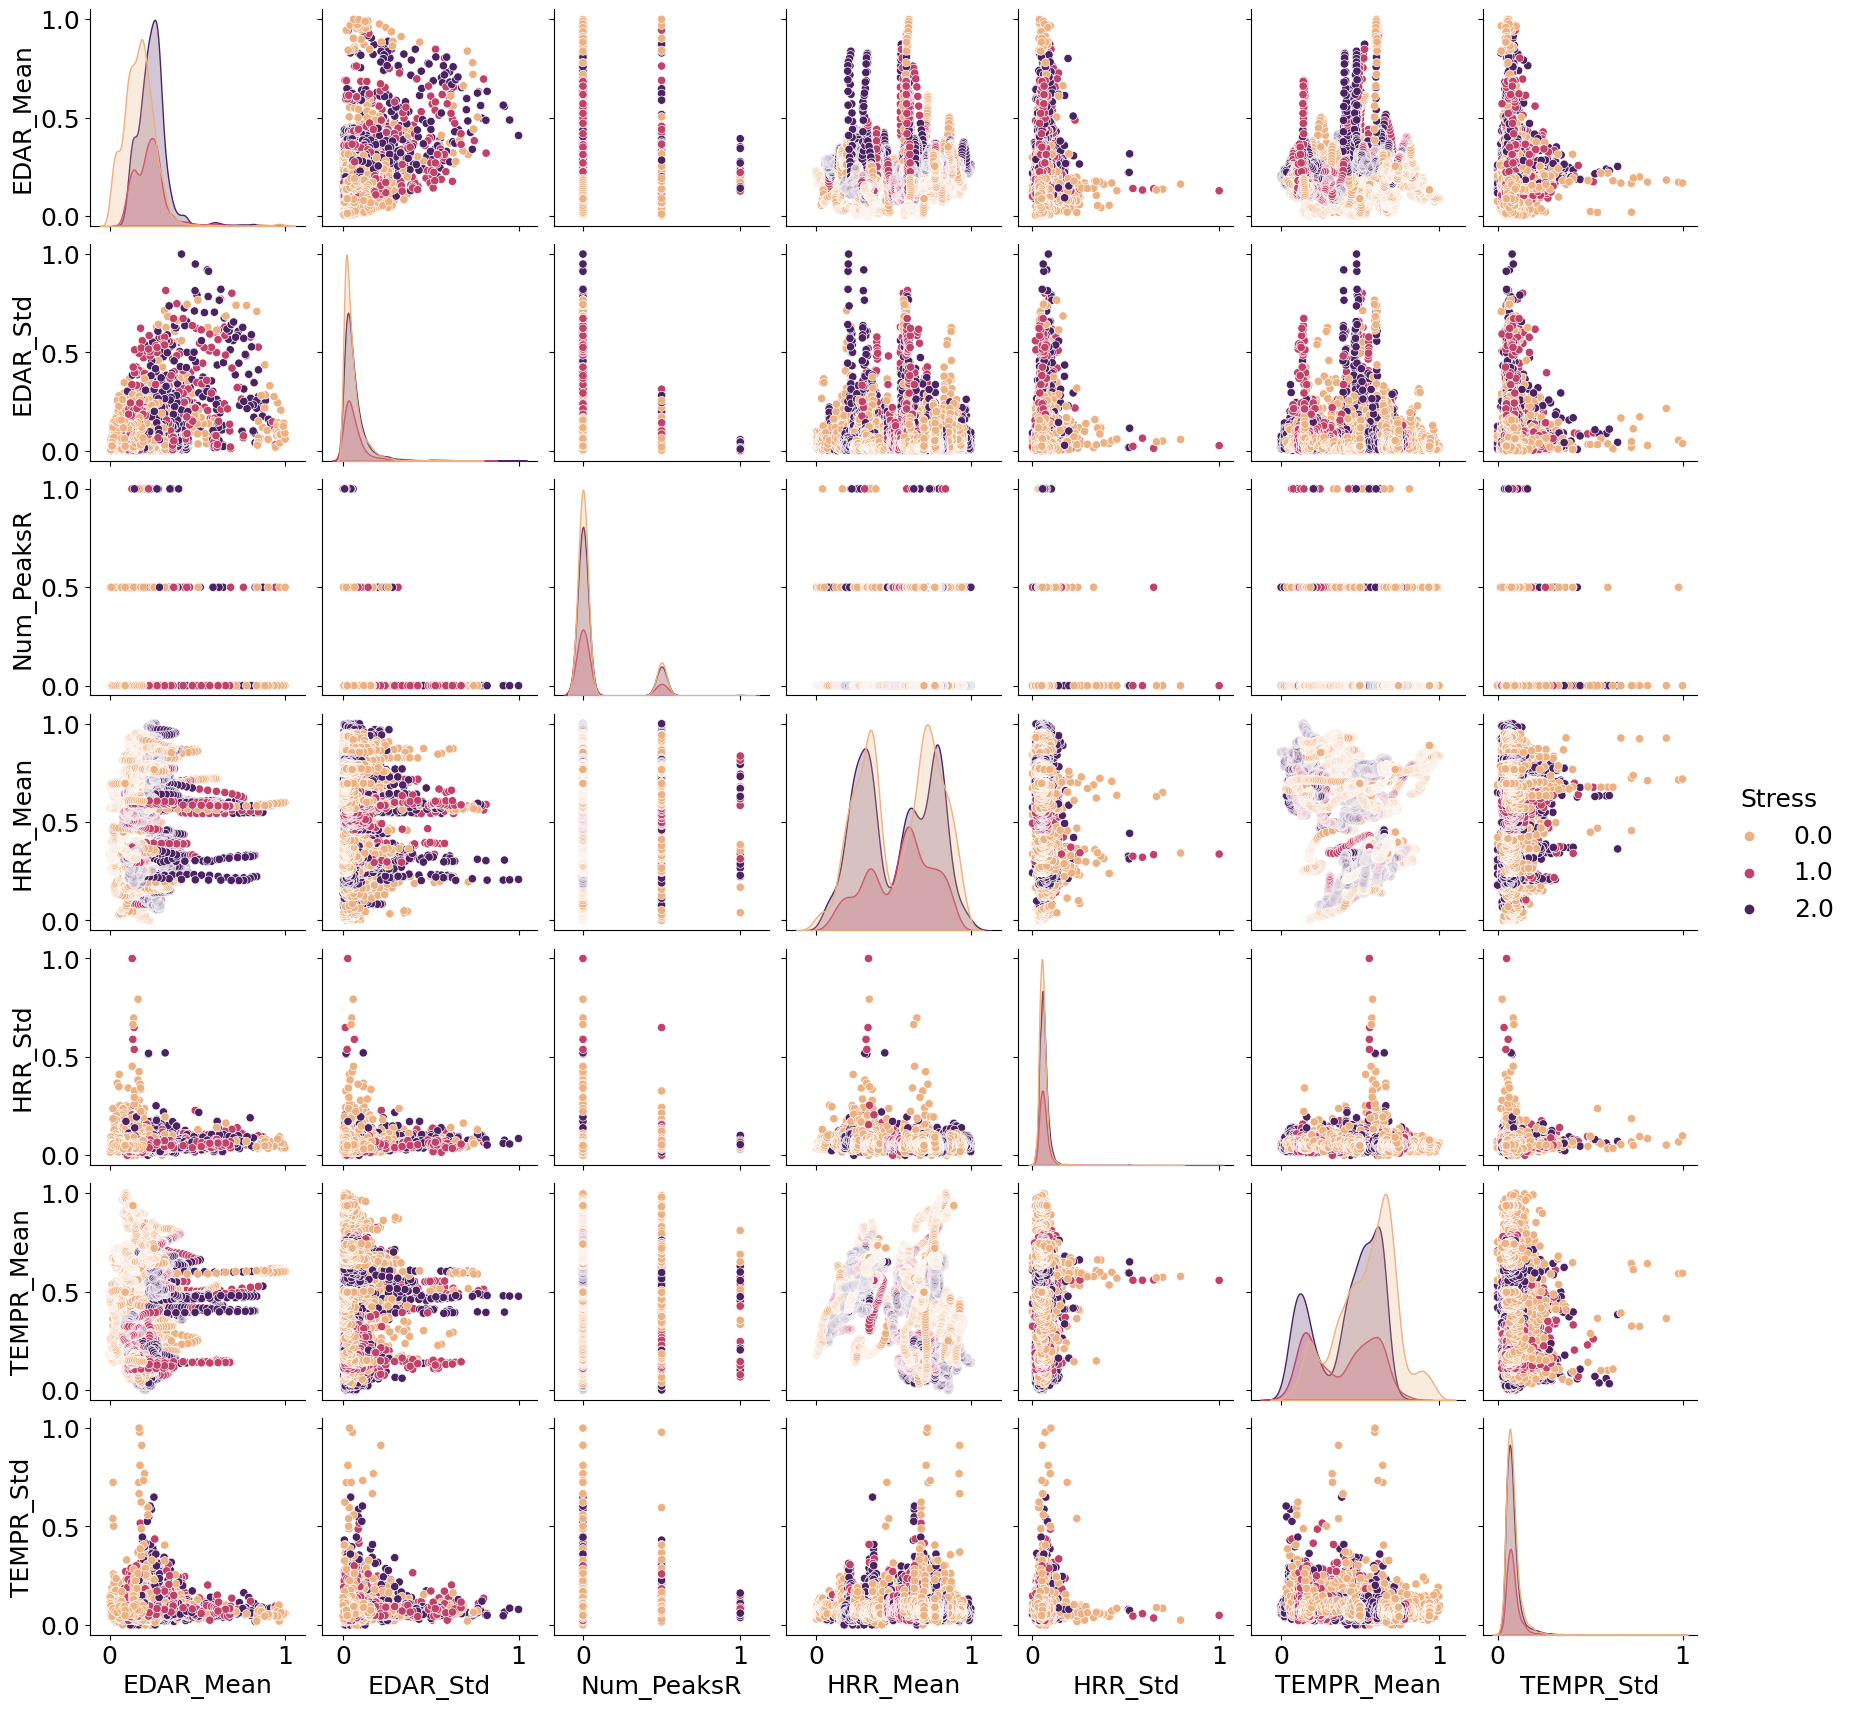

In [55]:
#Here is pairplot using Seaborn with specific figure size, hue, and color palette 
plt.figure(figsize = (15,8))
sns.pairplot(df, hue=Yvar, palette=palette)

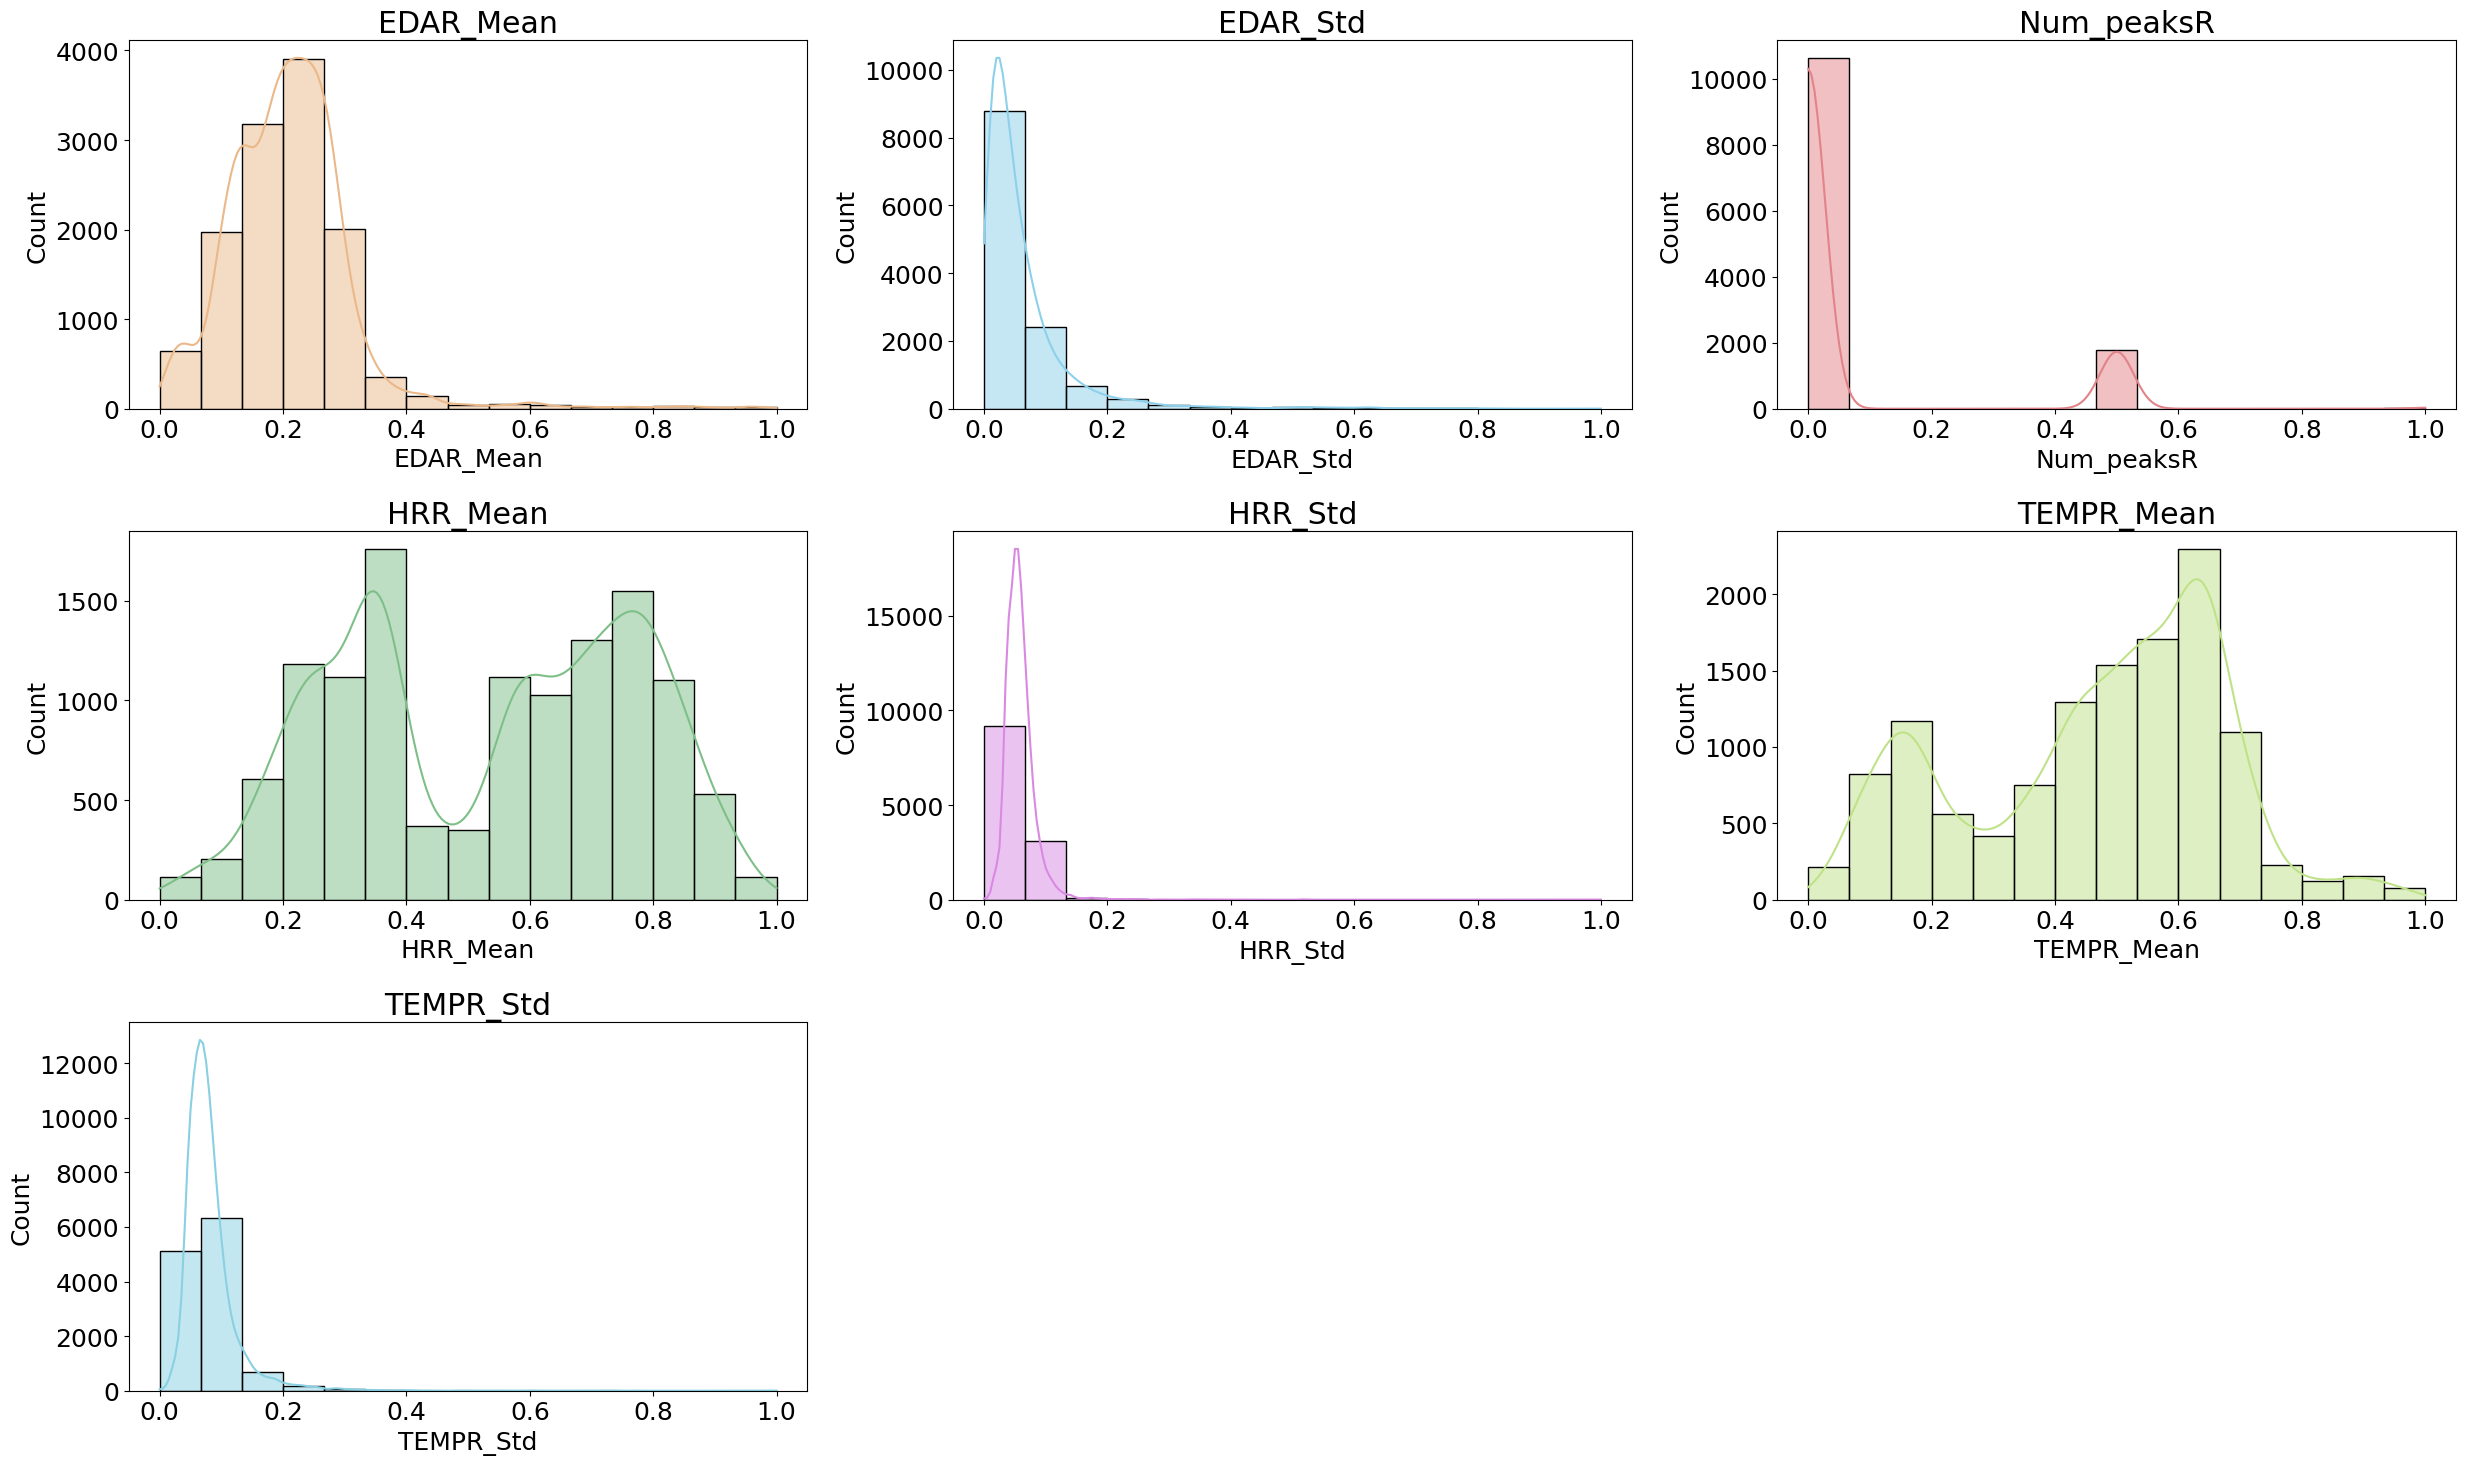

In [56]:
#here are histograms by iterating over the columns and plotting them individually

df.columns = ['EDAR_Mean', 'EDAR_Std', 'Num_peaksR', 'HRR_Mean', 'HRR_Std', 'TEMPR_Mean', 'TEMPR_Std', 'Stress']
colors = ['#eab889', '#8cd0eb', '#e28389', '#7ebf88', '#d989e2', '#bfe288', '#89d0e2']

data = df.copy()
data.drop('Stress', axis=1, inplace=True)

plt.figure(figsize=(25, 15))
plt.rcParams['font.size'] = 18

for idx, (column, color) in enumerate(zip(data.columns, colors)):
    plt.subplot(3, 3, idx + 1)
    sns.histplot(data[column], bins=15, color=color, kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()


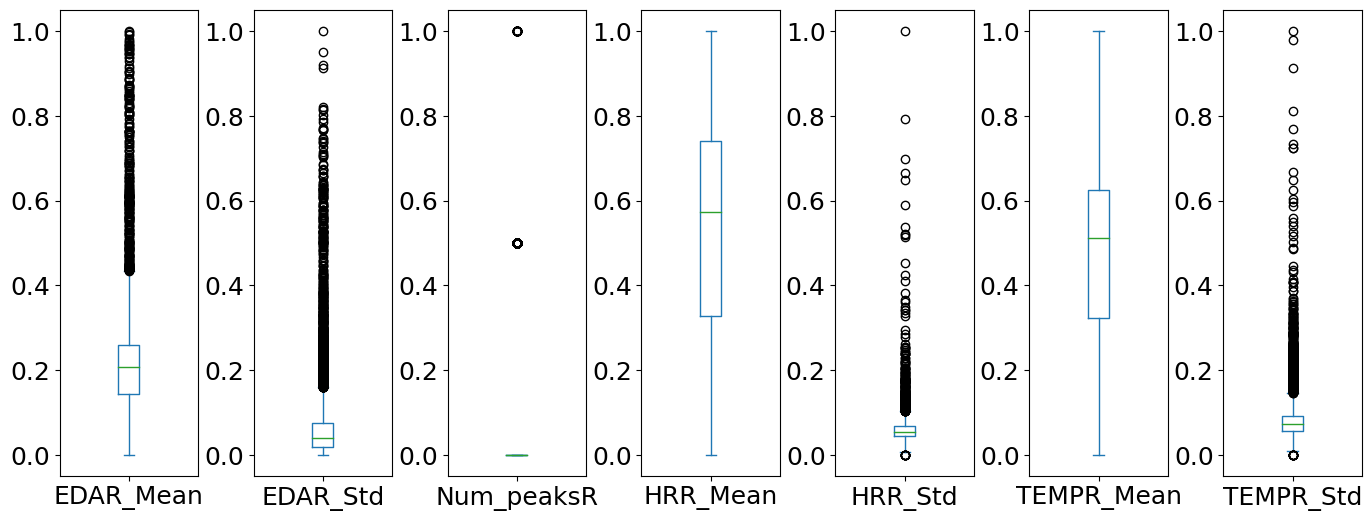

In [57]:
#Now I am doing  assuming 'data' in this DataFrame
data.plot(kind='box', subplots=True, layout=(2, 14), figsize=(14, 14), sharex=False, sharey=False)

# Adjust subplot spacing
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
# Show the plot
plt.show()


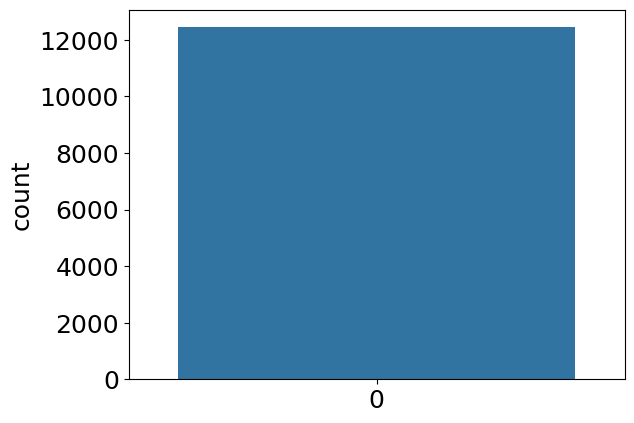

In [58]:
#lets check count of Stress
sns.countplot(df["Stress"])
plt.show()

## Classification

### Exploration

Simply attempting to implement an ML algorithm (without optimization or an ideal selection)

####K-NN
- **Keyword** : straightforward, comprehensible, flexible, ML
- **utilization** : detecting handwriting, recognizing images, identifying video content
- **Strengths**: valuable when labeled data is costly or unattainable, provides high accuracy
- **Weaknesses**: struggles with a large number of features (requires more data, leading to a risk of overfitting)

In this case, it's suitable since we don't have an excessive number of features.

In [59]:
X = df.drop(Yvar, axis=1)
Y = df[Yvar]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)


In [60]:
knn = KNeighborsClassifier(n_neighbors=3)

In [61]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [62]:
accuracy_score(y_test,knn.predict(X_test))

0.8525512253917236

#### Knn with feature selection
As Knn is better with less features (and also as features all seem correlated), let's try to reduce the dimension. We will use Recursive feature selection to reduce the features to 2.

In [63]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=2)

In [64]:
pipeline = Pipeline(steps=[('RFE',rfe),('KNN',knn)])

In [65]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('RFE',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=2)),
                ('KNN', KNeighborsClassifier(n_neighbors=3))])

In [66]:
accuracy_score(y_test,pipeline.predict(X_test))

0.840498192044998

A bit better

In [67]:
# Doing Cross Validation and find hyperparameter
from pandas.core.common import random_state
k = [5,10,15]
max_depth = [20, 40, 60]
for i in range(3):
    models = []
    models.append(('KNN', KNeighborsClassifier(n_neighbors=k[i])))
    models.append(('NB', GaussianNB()))
    models.append(('DT', DecisionTreeClassifier(max_depth=max_depth[i], random_state=101)))
    results = []
    names = []
    print("K:",k[i], "and max_depth:", max_depth[i])
    for name, model in models:
        kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    print("")

K: 5 and max_depth: 20
KNN: 0.825333 (0.011766)
NB: 0.563782 (0.010690)
DT: 0.857774 (0.005937)

K: 10 and max_depth: 40
KNN: 0.811272 (0.012104)
NB: 0.563782 (0.010690)
DT: 0.857573 (0.007769)

K: 15 and max_depth: 60
KNN: 0.795300 (0.004917)
NB: 0.563782 (0.010690)
DT: 0.857573 (0.007769)



In [68]:
# Create K-NN Model
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train, y_train)
predict_KNN = model_KNN.predict(X_test)

In [69]:
# Create NB Model
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
predict_NB = model_NB.predict(X_test)

In [70]:
# Create DT Model
model_DT = DecisionTreeClassifier(max_depth=40,random_state=101)
model_DT.fit(X_train, y_train)
predict_DT = model_DT.predict(X_test)

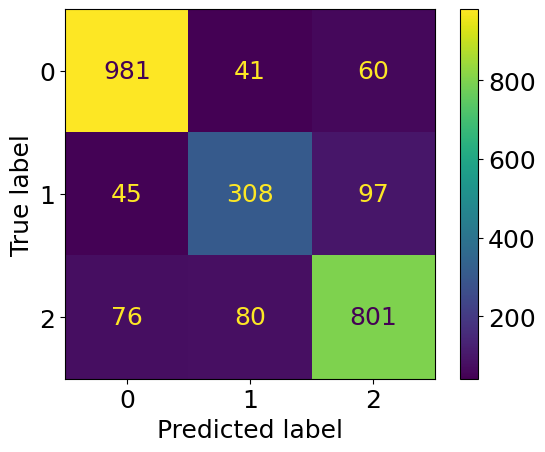

In [71]:
confusion_matrix = metrics.confusion_matrix(y_test, predict_KNN)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2])

cm_display.plot()
plt.show()

In [72]:
print(classification_report(y_test, predict_KNN))

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      1082
         1.0       0.72      0.68      0.70       450
         2.0       0.84      0.84      0.84       957

    accuracy                           0.84      2489
   macro avg       0.81      0.81      0.81      2489
weighted avg       0.84      0.84      0.84      2489



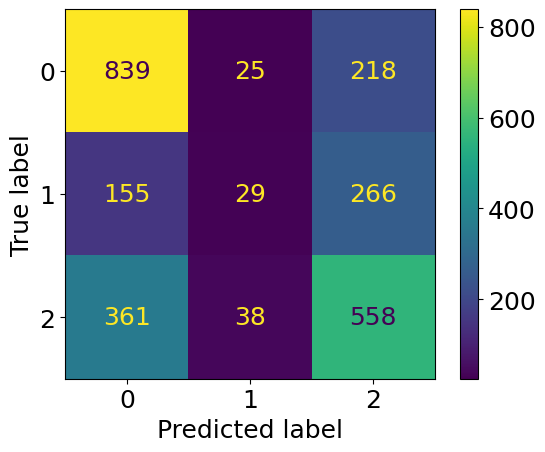

In [73]:
confusion_matrix = metrics.confusion_matrix(y_test, predict_NB)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2])

cm_display.plot()
plt.show()

In [74]:
print(classification_report(y_test, predict_NB))

              precision    recall  f1-score   support

         0.0       0.62      0.78      0.69      1082
         1.0       0.32      0.06      0.11       450
         2.0       0.54      0.58      0.56       957

    accuracy                           0.57      2489
   macro avg       0.49      0.47      0.45      2489
weighted avg       0.53      0.57      0.53      2489



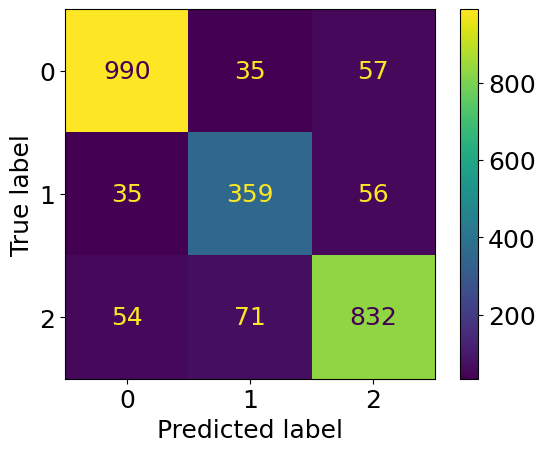

In [75]:
confusion_matrix = metrics.confusion_matrix(y_test, predict_DT)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2])

cm_display.plot()
plt.show()

In [76]:
print(classification_report(y_test, predict_DT))

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92      1082
         1.0       0.77      0.80      0.78       450
         2.0       0.88      0.87      0.87       957

    accuracy                           0.88      2489
   macro avg       0.86      0.86      0.86      2489
weighted avg       0.88      0.88      0.88      2489



### Thank you